<a href="https://colab.research.google.com/github/singh-priyanshi/ECE9133-MachineLearningForCybersecurity/blob/main/ps4609_Lab_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ML for Cybersecurity - Lab 03

**Name:** Priyanshi Singh </br>
**NETID:** ps4609

## Packages

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import accuracy_score

In [ ]:
# Load the MNIST dataset
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train[0][10]

11490434/11490434 [==============================] - 0s 0us/step


array([  0,   0,   0,   0,   0,   0,   0,   0,   0,  14,   1, 154, 253,
        90,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0], dtype=uint8)

In [ ]:
# Normalize the input image of the Dataset (Xtrain, Xtest)
x_train, x_test = x_train / 255.0, x_test / 255.0

In [ ]:
# Print the shapes and types of the data
print("Training data shape:", x_train.shape)
print("Testing data shape:", x_test.shape)
print("Data type of x_train:", type(x_train))

Training data shape: (60000, 28, 28)
Testing data shape: (10000, 28, 28)
Data type of x_train: <class 'numpy.ndarray'>


In [ ]:
x_train[0][10] #image pixel now range from 0 to 1

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.05490196,
       0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        ])

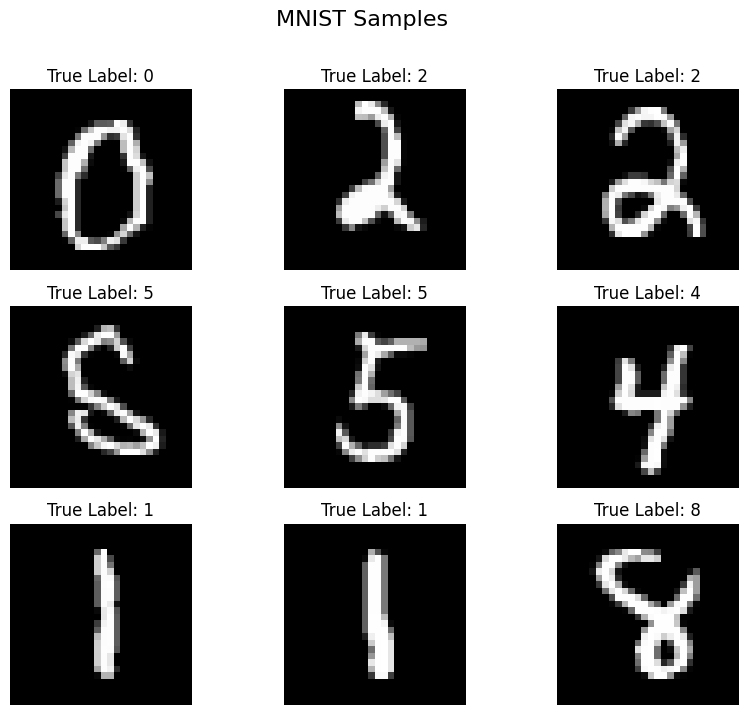

In [ ]:
# Data visualization
fig, axs = plt.subplots(3, 3, figsize=(10, 8))
fig.suptitle("MNIST Samples", fontsize=16)

for ax in axs.ravel():
    index = np.random.randint(x_train.shape[0])
    img, label = x_train[index], y_train[index]
    ax.imshow(img, cmap="gray")
    ax.set_title("True Label: {}".format(label))
    ax.axis('off')

plt.show()

# DNN

Deep Neural Network Model (DNN) Architecture

The structure comprises the following layers:

Input Layer:

Dimensions: (28, 28) - denoting the size of the input images.

Flattened: Utilizing layers.Flatten to transform the 2D image into a 1D array, sized at 784.

Hidden Layer:

Dense Layer: layers.Dense(300, activation='relu'). Incorporating 300 neurons with the rectified linear unit (ReLU) activation function, a widely adopted non-linear activation. Dropout Layer:

layers.Dropout(0.2). Introducing a dropout layer featuring a dropout rate of 0.2. This aids in averting overfitting by randomly zeroing a portion of input units during training. Output Layer:

Dense Layer: layers.Dense(10, activation='softmax'). Comprising 10 neurons representing the output classes, utilizing the softmax activation function. Softmax is applied for multi-class classification, providing a probability distribution across the classes.

## Simple deep learning model for MNIST digit classification

In [ ]:
import tensorflow as tf

# Define the Deep Neural Network (DNN) model
def create_DNN_model():
    model = tf.keras.models.Sequential([
        tf.keras.layers.Flatten(input_shape=(28, 28)),
        tf.keras.layers.Dense(350, activation='relu'),
        tf.keras.layers.Dropout(0.2),
        tf.keras.layers.Dense(10, activation='softmax')
    ])
    return model

loss_fn = tf.keras.losses.sparse_categorical_crossentropy

The optimization process utilizes the Adam optimizer to minimize the loss function, with a learning rate of 0.001 determining the optimization step size. For multi-class classification problems with integer labels, Sparse Categorical Crossentropy is employed as the chosen loss function. Evaluation and monitoring of the model's performance during both training and testing phases will rely on the 'accuracy' metric, which gauges the proportion of accurately classified samples.

In [ ]:
# Define the training process
def train_DNN_model(model, x_train, y_train, epochs=5):
   model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
   return model.fit(x_train, y_train, epochs=epochs)

In [ ]:
# Evaluate the model on the test data
def evaluate_DNN_model(model, x_test, y_test):
    res = model.evaluate(x_test, y_test, verbose=2)
    return res

In [ ]:
# Define a function to find correctly classified images
def correct_classified_images(model, X, Y):
    correct_classified_imgs = []
    correct_classified_labels = []
    count = 0

    for i, img in enumerate(X):
        img = img[np.newaxis, ...]
        pred = model(img)
        pred = tf.nn.softmax(pred)
        pred = tf.math.argmax(pred, axis=1).numpy()
        if pred == Y[i]:
            count += 1
            correct_classified_imgs.append(tf.convert_to_tensor(img, dtype=tf.float32))
            correct_classified_labels.append(tf.convert_to_tensor(Y[i]))

    return count, correct_classified_imgs, correct_classified_labels

In [ ]:
# Load the MNIST dataset and preprocess it
mnist = tf.keras.datasets.mnist
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalized the data
x_train, x_test = x_train / 255.0, x_test / 255.0

# Create and train the DNN model
DNN_model = create_DNN_model()
history = train_DNN_model(DNN_model, x_train, y_train, epochs=5)

print("Training Loss: ", history.history['loss'][-1])
print("Training Accuracy: ", history.history['accuracy'][-1])


Epoch 1/5
1875/1875 [==============================] - 20s 9ms/step - loss: 0.2357 - accuracy: 0.9294
Epoch 2/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.1027 - accuracy: 0.9685
Epoch 3/5
1875/1875 [==============================] - 14s 8ms/step - loss: 0.0759 - accuracy: 0.9762
Epoch 4/5
1875/1875 [==============================] - 14s 7ms/step - loss: 0.0595 - accuracy: 0.9815
Epoch 5/5
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0486 - accuracy: 0.9843
Training Loss:  0.04855285957455635
Training Accuracy:  0.9842666387557983
313/313 - 1s - loss: 0.0591 - accuracy: 0.9821 - 1s/epoch - 4ms/step
313/313 [==============================] - 1s 4ms/step

Test Loss of Model: 0.0591241754591465

Test Accuracy of Model: 0.9821000099182129

Number of Correctly Classified Images: 9821


In [ ]:
# Evaluate the model on the test data
evaluation_result = evaluate_DNN_model(DNN_model, x_test, y_test)

# Find correctly classified images and count
ypred = DNN_model.predict(x_test).argmax(axis=1)

count = len(np.where(ypred==y_test)[0])
print("\nTest Loss of Model:", evaluation_result[0])
print("\nTest Accuracy of Model:", evaluation_result[1])
print("\nNumber of Correctly Classified Images:", count)

313/313 - 1s - loss: 0.0591 - accuracy: 0.9821 - 1s/epoch - 5ms/step
313/313 [==============================] - 2s 5ms/step

Test Loss of Model: 0.0591241754591465

Test Accuracy of Model: 0.9821000099182129

Number of Correctly Classified Images: 9821


## FGSM based untargeted attack

Create perturbed images for a specified dataset using an untargeted adversarial attack.

Input:
- model: The targeted neural network model.
- X: The test dataset.
- Y: True labels for the test dataset.
- eps: Magnitude of perturbation (epsilon) controlling the strength of the adversarial attack.

Output:
- perturbed_images: Images with small adversarial perturbations added to the originals.


In [ ]:
# Define functions for generating perturbations
def generate_perturb_untarget_img(model, X, Y, eps):
  X = tf.convert_to_tensor(X, dtype=tf.float32)

  #observe the gradient on input
  with tf.GradientTape() as tape:
    tape.watch(X)
    pred = model(X)
    loss = loss_fn(Y, pred)

  #calculate the gradient of loss w.r.t X(img)
  grad = tape.gradient(loss, X)

  #Sign of gradient
  grad_sign = tf.sign(grad)

  #Add adversarial (or noise) to image
  x_perturb = X + eps * grad_sign

  #clip any value outside the range
  x_perturb = tf.clip_by_value((x_perturb), clip_value_min = 0, clip_value_max = 1)
  return x_perturb

In [ ]:
def calculate_accuracy_success_rate_untarget(model, perturbImg, X,  Y, correct_classified_index):

    # Make predictions on the adversarial images, it returns softmax probability, highest probability index would be the label for the prediction
    adversary_pred = model.predict(perturbImg).argmax(axis=1)

    # Calculate accuracy of the model on the adversarial images
    accuracy_untarget = accuracy_score(Y, adversary_pred)

    # success rate would be all the test data which were previously correctly classified but missclassified after perturbation
    incorrect_classify_count = len(np.where(adversary_pred[correct_classified_index] != Y[correct_classified_index])[0])
    success_adversarial_untarget =  incorrect_classify_count / len(Y[correct_classified_index])

    return accuracy_untarget, success_adversarial_untarget



In [ ]:
# Define the list of epsilon values
epsilons = [1/255, 10/255, 20/255, 30/255, 50/255, 70/255, 100/255, 125/255]

# Lists to store accuracy and success attack rate
acc_untarget_list = []
success_untarget_attack_rate_list = []

# # Calculate the number of correctly classified images and their labels

print("Calculate Predictions for Test Data")
# Iterate through epsilon values
ypred = DNN_model.predict(x_test).argmax(axis=1)

#Finding Correctly Classified Indices
correct_classified_index = np.where(ypred == y_test)

for eps in epsilons:
    print("Epsilon Value: ", eps)
    # Generate perturbed untargeted images

    x_perturb = generate_perturb_untarget_img(DNN_model, x_test, y_test, eps).numpy()

    # Calculate accuracy and success rate of the model on the adversarial images
    acc_untarget, success_untarget_attack_rate = calculate_accuracy_success_rate_untarget(DNN_model, x_perturb, x_test, y_test, correct_classified_index)

    acc_untarget_list.append(acc_untarget)
    success_untarget_attack_rate_list.append(success_untarget_attack_rate)


Calculate Predictions for Test Data
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.00392156862745098
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.0392156862745098
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.0784313725490196
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.11764705882352941
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.19607843137254902
313/313 [==============================] - 1s 4ms/step
Epsilon Value:  0.27450980392156865
313/313 [==============================] - 1s 4ms/step
Epsilon Value:  0.39215686274509803
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.49019607843137253
313/313 [==============================] - 1s 3ms/step



Untargeted Attack Results:
Epsilon is: 0.00392156862745098, Accuracy: 0.9782, Success Attack Rate is: 0.003971082374503615
Epsilon is: 0.0392156862745098, Accuracy: 0.8406, Success Attack Rate is: 0.1440790143569901
Epsilon is: 0.0784313725490196, Accuracy: 0.4096, Success Attack Rate is: 0.5829345280521332
Epsilon is: 0.11764705882352941, Accuracy: 0.152, Success Attack Rate is: 0.8452296100193463
Epsilon is: 0.19607843137254902, Accuracy: 0.028, Success Attack Rate is: 0.9714896650035638
Epsilon is: 0.27450980392156865, Accuracy: 0.0091, Success Attack Rate is: 0.9907341411261582
Epsilon is: 0.39215686274509803, Accuracy: 0.0013, Success Attack Rate is: 0.9986763058751654
Epsilon is: 0.49019607843137253, Accuracy: 0.0005, Success Attack Rate is: 0.9994908868750636


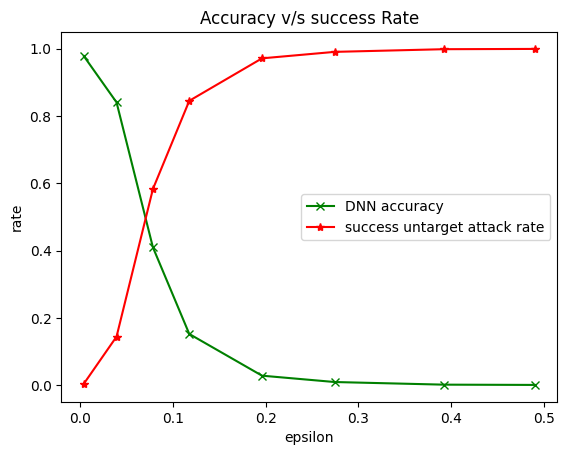

In [ ]:
# Plot the results
plt.plot(epsilons, acc_untarget_list, marker='x', color='green')
plt.plot(epsilons, success_untarget_attack_rate_list, marker='*', color='red')
plt.xlabel('epsilon')
plt.ylabel('rate')
plt.legend(['DNN accuracy', 'success untarget attack rate'])
plt.title("Accuracy v/s success Rate")

print("\nUntargeted Attack Results:")
for i, eps in enumerate(epsilons):
    print(f"Epsilon is: {eps}, Accuracy: {acc_untarget_list[i]}, Success Attack Rate is: {success_untarget_attack_rate_list[i]}")


## FGSM based targeted attack

Create perturbed images for a specified dataset using an targeted adversarial attack.

Input:
- model: The targeted neural network model.
- X: The test dataset.
- Y: True labels for the test dataset.
- epsilon: Magnitude of perturbation (epsilon) controlling the strength of the adversarial attack.

Output:
- perturbed_images: Images with small adversarial perturbations added to the originals.



In [ ]:
# Define functions for generating targeted perturbations
def generate_perturb_target_img(model, X, Y, epsilon):

    #modify the label of input image
    y_target = [(y + 1) % 10 for y in Y]

    x_tensor = tf.convert_to_tensor(X, dtype=tf.float32)

    #watch the gradient on Input image
    with tf.GradientTape() as tape:
        tape.watch(x_tensor)
        pred = model(x_tensor)
        loss = loss_fn(y_target, pred)

    # calcualte teh gradient of loss wrt x_tensor
    grad = tape.gradient(loss, x_tensor)

    #get sign of gradient
    grad_sign = tf.sign(grad)

    #add negative of adversarial perturbation to image
    x_perturb = x_tensor - epsilon * grad_sign
    x_perturb = tf.clip_by_value((x_perturb), clip_value_min=0, clip_value_max=1)
    return x_perturb

In [ ]:
def calculate_accuracy_success_rate_target(model, perturbImg, X, Y, correct_classified_index):
    # Make predictions on the adversarial images
    adversary_pred = model.predict(perturbImg).argmax(axis=1)

    # Calculate accuracy of the model on the adversarial images
    accuracy_target = accuracy_score(Y, adversary_pred)

    # success rate would be all the test data which were previously correctly classified and even classified after perturbation
    correctly_classified_count = len(np.where(adversary_pred[correct_classified_index] == (Y[correct_classified_index] + 1)%10)[0])
    success_adversarial_target = correctly_classified_count / len(Y[correct_classified_index])

    return accuracy_target, success_adversarial_target

In [ ]:
# Define the list of epsilon values
epsilons = [1/255, 10/255, 20/255, 30/255, 50/255, 70/255, 100/255, 125/255]

# Lists to store accuracy and success attack rate
acc_target_list = []
success_target_attack_rate_list = []

# Calculate the number of correctly classified images and their labels

print("Calculate Predictions for Test Data")
# Iterate through epsilon values
ypred = DNN_model.predict(x_test).argmax(axis=1)

#Finding Correctly Classified Indices
correct_classified_index = np.where(ypred == y_test)

for eps in epsilons:
    print("Epsilon Value: ", eps)
    # Generate perturbed untargeted images

    x_perturb = generate_perturb_target_img(DNN_model, x_test, y_test, eps).numpy()

    # Calculate accuracy and success rate of the model on the adversarial images
    acc_target, success_target_attack_rate = calculate_accuracy_success_rate_target(DNN_model, x_perturb, x_test, y_test, correct_classified_index)

    acc_target_list.append(acc_target)
    success_target_attack_rate_list.append(success_target_attack_rate)


Calculate Predictions for Test Data
313/313 [==============================] - 2s 7ms/step
Epsilon Value:  0.00392156862745098
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.0392156862745098
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.0784313725490196
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.11764705882352941
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.19607843137254902
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.27450980392156865
313/313 [==============================] - 1s 3ms/step
Epsilon Value:  0.39215686274509803
313/313 [==============================] - 1s 4ms/step
Epsilon Value:  0.49019607843137253
313/313 [==============================] - 1s 3ms/step


Targeted Attack Results:
Epsilon is: 0.00392156862745098, Accuracy: 0.9813, Success Attack Rate is: 0.000610935749923633
Epsilon is: 0.0392156862745098, Accuracy: 0.943, Success Attack Rate is: 0.01690255574788718
Epsilon is: 0.0784313725490196, Accuracy: 0.6644, Success Attack Rate is: 0.19549943997556257
Epsilon is: 0.11764705882352941, Accuracy: 0.3492, Success Attack Rate is: 0.391304347826087
Epsilon is: 0.19607843137254902, Accuracy: 0.057, Success Attack Rate is: 0.6334385500458202
Epsilon is: 0.27450980392156865, Accuracy: 0.0056, Success Attack Rate is: 0.7179513287852561
Epsilon is: 0.39215686274509803, Accuracy: 0.0002, Success Attack Rate is: 0.7102128092862234
Epsilon is: 0.49019607843137253, Accuracy: 0.0003, Success Attack Rate is: 0.6560431727929946


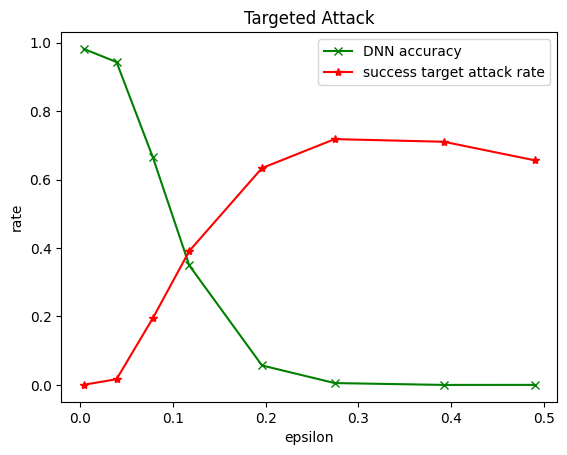

In [ ]:
# Plot the results for targeted attack
plt.plot(epsilons, acc_target_list, marker='x', color='green')
plt.plot(epsilons, success_target_attack_rate_list, marker='*', color='red')
plt.xlabel('epsilon')
plt.ylabel('rate')
plt.legend(['DNN accuracy', 'success target attack rate'])
plt.title("Targeted Attack")

print("Targeted Attack Results:")
for i, eps in enumerate(epsilons):
    print(f"Epsilon is: {eps}, Accuracy: {acc_target_list[i]}, Success Attack Rate is: {success_target_attack_rate_list[i]}")


## Adversarial Retraining against Untargeted FGSM Attack

In [ ]:
# Generate perturbed untargeted images and retrain the model
epsilon = 125/255

#generate the perturb images for train data
x_perturb_train = generate_perturb_untarget_img(DNN_model, x_train, y_train, epsilon)
x_perturb_test = generate_perturb_untarget_img(DNN_model, x_test, y_test, epsilon)


#add data to train dataset
y_retrain = np.hstack((y_train, y_train))
x_retrain = np.vstack((x_train, x_perturb_train))

history = DNN_model.fit(x_retrain, y_retrain, epochs=5)

print("\nTraining accuracy for Retrained model", history.history['accuracy'][-1])
print("\nTraining Loss for Retrained model", history.history['loss'][-1])
print("\nEvaluate the retrained model on the test data")
# Evaluate the retrained model on the test data
res_retrain = DNN_model.evaluate(x_test, y_test, verbose=2)

print("Test Loss for Retrained Model", res_retrain[0])
print("Test Accuracy for Retrained Model", res_retrain[1])


Epoch 1/5
3750/3750 [==============================] - 34s 9ms/step - loss: 0.1401 - accuracy: 0.9596
Epoch 2/5
3750/3750 [==============================] - 28s 8ms/step - loss: 0.0383 - accuracy: 0.9876
Epoch 3/5
3750/3750 [==============================] - 33s 9ms/step - loss: 0.0295 - accuracy: 0.9904
Epoch 4/5
3750/3750 [==============================] - 38s 10ms/step - loss: 0.0246 - accuracy: 0.9919
Epoch 5/5
3750/3750 [==============================] - 27s 7ms/step - loss: 0.0218 - accuracy: 0.9929
Training accuracy for Retrained model 0.9928666949272156
Training Loss for Retrained model 0.021772418171167374

Evaluate the retrained model on the test data
313/313 - 2s - loss: 0.0729 - accuracy: 0.9801 - 2s/epoch - 5ms/step
Test Loss for Retrained Model 0.07294577360153198
Test Accuracy for Retrained Model 0.9800999760627747


### Robustness of adversarially trained DNN model against adversarial perturbations

In [ ]:
#get the predictions for test images
ypred = DNN_model.predict(x_test, verbose=False).argmax(axis=1)
correct_classified_index = np.where(ypred == y_test)

#epsilon
eps = 125/255

#generate the adversarial perturb images using the retrained model
adversary_images = generate_perturb_untarget_img(DNN_model, x_test, y_test, eps)

#get the prediction
adversary_pred = DNN_model.predict(adversary_images, verbose=False).argmax(axis=1)

#get the accuracy of the model against the perturb imabes generated using the retrained model
print(f"Accuracy:  {accuracy_score(y_test, adversary_pred)}")

#success rate is calculated by checking total number of samples missclassified which were corrctly classfied earlier.
wrongly_classified_count = len(np.where(adversary_pred[correct_classified_index] != y_test[correct_classified_index])[0])

print(f"Success Rate: {wrongly_classified_count/len(y_test[correct_classified_index])}")


Accuracy:  0.3605
Success Rate: 0.6332006938067544


In our analysis, we observe a decrease in model accuracy when generating images from the retrained model, as anticipated. Given that the model weights have been modified through retraining, it follows that the perturbed images would be affected as well. Despite this, the accuracy of the retrained model remains superior to that of the previous model.

In [ ]:
#get the prediction on perturb images generated from model trained before retraining

adversary_pred = DNN_model.predict(x_perturb_test, verbose=False).argmax(axis=1)
print(f"Accuracy:  {accuracy_score(y_test, adversary_pred)}")

#success rate is calculated by checking total number of samples missclassified which were corrctly classfied earlier.
wrongly_classified_count = len(np.where(adversary_pred[correct_classified_index] != y_test[correct_classified_index])[0])
print(f"Success Rate: {wrongly_classified_count/len(y_test[correct_classified_index])}")




Accuracy:  0.9993
Success Rate: 0.0007142128354249566


In our observations, the model demonstrates significantly improved accuracy on perturbed test data, coupled with a notably low adversarial success rate. This suggests that our model exhibits high robustness against adversarial perturbations following the fine-tuning process.